In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics
import warnings   
warnings.filterwarnings("ignore")

In [24]:
#path_port = "archive/House_Rent_Dataset.csv"
data = pd.read_csv("archive/House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [26]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [27]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [29]:
data.dtypes


Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [30]:
#df = pd.DataFrame(data)

# Delete columns 'B' and 'C'
#columns_to_delete = ['Posted On']
##df = df.drop(columns=columns_to_delete)

# Print the resulting DataFrame
#df

In [31]:
data.tail(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4736,2022-06-28,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Family,3,Contact Owner
4737,2022-07-07,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4738,2022-07-06,2,17000,855,4 out of 5,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [32]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [33]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# Build the Linear Regression Model

In [36]:
#independent feature and dependent feature
#X = data[['BHK','Rent','Size','Floor','Area Type','Area Locality','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
X = data[['Rent','Size','Bathroom']] #feature
y = data[['Size']].astype(float) #target
X.head().astype(float)

,Rent,Size,Bathroom
0,10000.0,1100.0,2.0
1,20000.0,800.0,1.0
2,17000.0,1000.0,1.0
3,10000.0,800.0,1.0
4,7500.0,850.0,1.0


In [37]:
y

,Size
0,1100.0
1,800.0
2,1000.0
3,800.0
4,850.0
...,...
4741,1000.0
4742,2000.0
4743,1750.0
4744,1500.0


In [38]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(3796, 3)
(950, 3)
(3796, 1)
(950, 1)


In [39]:
#Create and Train the Linear Regressioon model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,  y_train)

LinearRegression()

In [45]:
#coeff_df = pd.DataFrame(model.coef_,X.columns,columns=["Coefficient"])

In [46]:
#predictions = lr.predict(X_test)
#predictions
model.fit(X,y)

LinearRegression()

In [47]:
#Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean_Squared_Error:- ",mse)
print("R-squared: ",r2)

Mean_Squared_Error:-  1.3867599426590506e-25
R-squared:  1.0


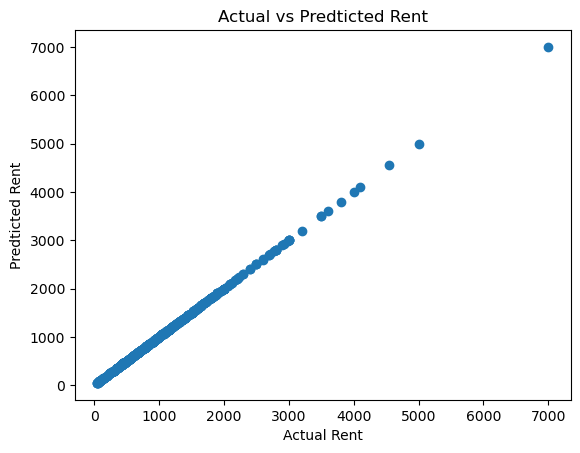

In [48]:
#visualize 
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predticted Rent')
plt.title('Actual vs Predticted Rent')
plt.show()

<AxesSubplot:xlabel='Rent'>

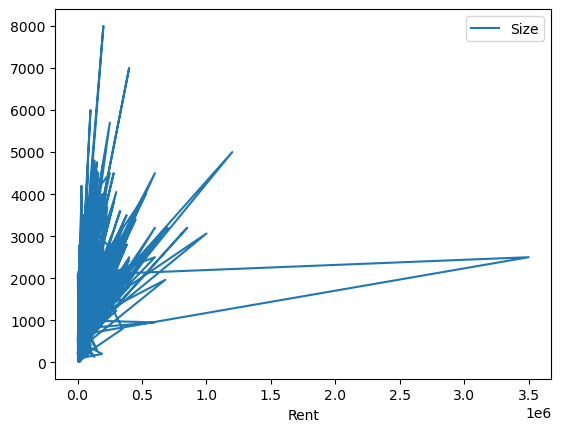

In [49]:
data.plot("Rent", "Size")

<AxesSubplot:xlabel='Rent', ylabel='Size'>

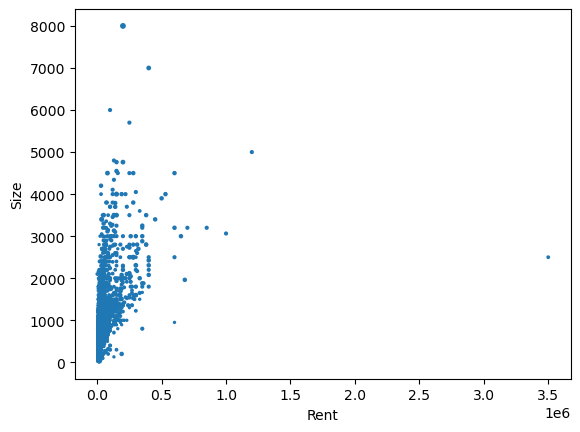

In [50]:
data.plot.scatter("Rent", "Size","Bathroom")

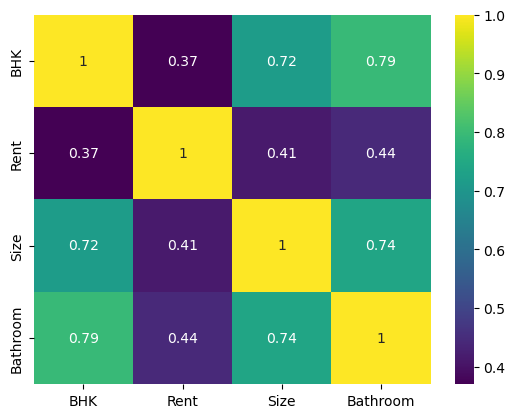

In [51]:
corrMatrix = data.corr() 
sns.heatmap(corrMatrix, annot=True, cmap="viridis") 
plt.show() 

<AxesSubplot:xlabel='Size'>

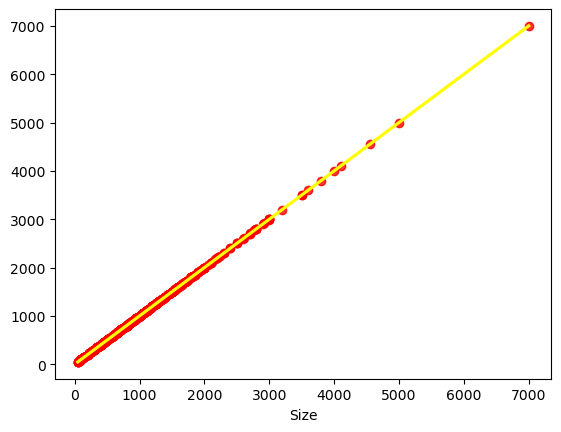

In [52]:
# create scatterplot with regression line 
sns.regplot(y_test, y_pred, scatter_kws={"color": "red"}, line_kws={"color": "yellow"}) 

In [53]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.transform(X_test)

In [56]:
scaler.inverse_transform(X_train)

array([[2.35e+04, 9.50e+02, 2.00e+00],
       [1.05e+04, 8.00e+02, 2.00e+00],
       [1.90e+04, 5.45e+02, 1.00e+00],
       ...,
       [2.00e+04, 8.00e+02, 2.00e+00],
       [8.50e+04, 3.50e+03, 3.00e+00],
       [2.50e+04, 4.50e+02, 2.00e+00]])

In [57]:
from sklearn.model_selection import cross_val_score

In [59]:
mse = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv =10)

In [60]:
#mean square  itna mean square ke baad itna accha a rha hai and predicated and truth value ka different hota hai
np.mean(mse)

-8.576287627958243e-25

In [62]:
##prediction
reg_pred = model.predict(X_test)
reg_pred

array([[ 2.09278083e-01],
       [-2.63117395e-01],
       [-7.07169144e-01],
       [ 8.39138720e-01],
       [ 1.99650764e+00],
       [ 1.30545503e-01],
       [-5.38681424e-01],
       [-4.20582554e-01],
       [ 2.41379031e+00],
       [-4.99315134e-01],
       [-4.99315134e-01],
       [-7.35512873e-01],
       [ 5.18129234e-02],
       [-6.56780293e-01],
       [ 2.09278083e-01],
       [-6.56780293e-01],
       [ 2.57125547e+00],
       [-2.63117395e-01],
       [ 4.45475822e-01],
       [ 1.39026678e+00],
       [ 4.83267460e-01],
       [-8.92978032e-01],
       [-8.14245453e-01],
       [ 3.66743242e-01],
       [ 3.20111611e+00],
       [-6.56780293e-01],
       [-7.35512873e-01],
       [ 1.39026678e+00],
       [-8.14245453e-01],
       [-5.78047714e-01],
       [-8.92978032e-01],
       [-8.20544059e-01],
       [-7.35512873e-01],
       [-1.84384816e-01],
       [ 5.18129234e-02],
       [ 4.61222338e-01],
       [-4.99315134e-01],
       [-7.35512873e-01],
       [ 5.1

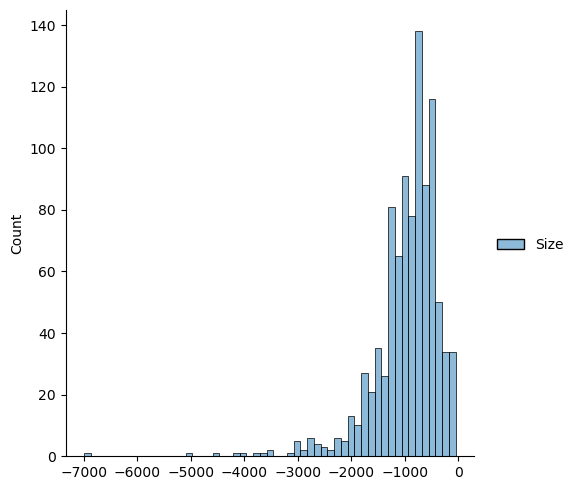

In [63]:
import seaborn as sns
sns.displot(reg_pred-y_test)

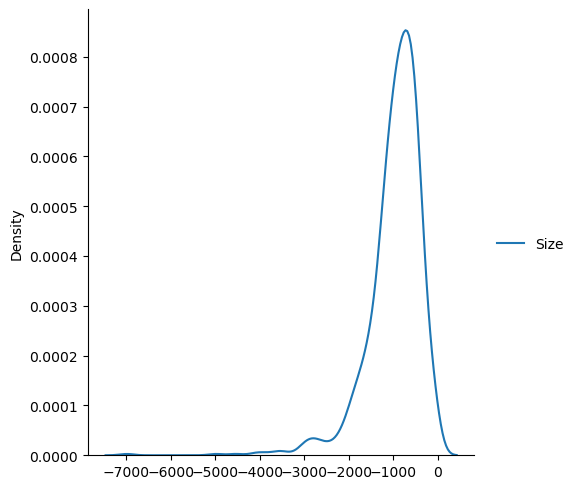

In [64]:
sns.displot(reg_pred-y_test,kind = 'kde')

In [65]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)
score

-1354997.2292192576

<AxesSubplot:>

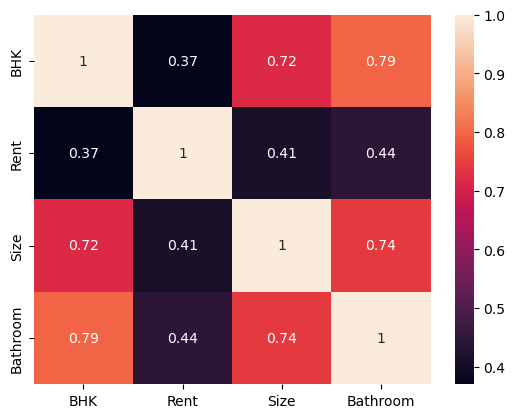

In [66]:
sns.heatmap(data.corr(), annot = True)

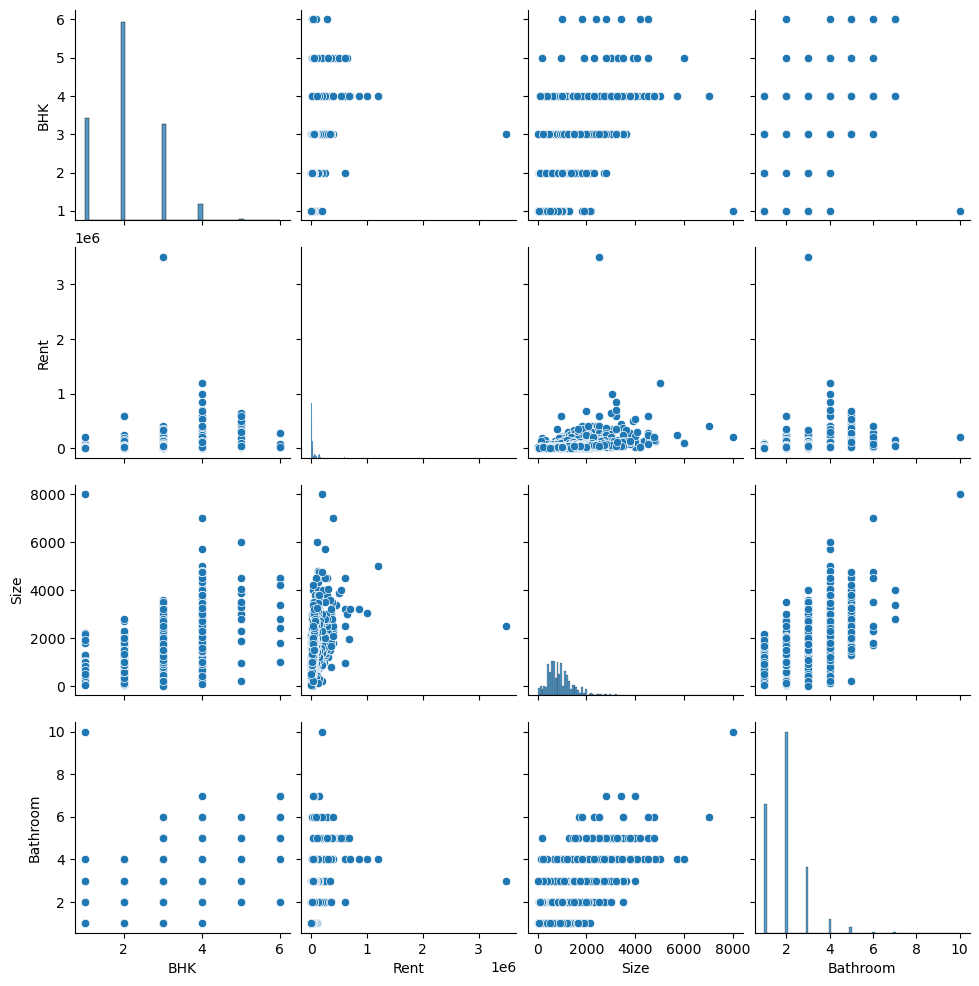

In [67]:
sns.pairplot(data)

In [68]:
print(data.columns)

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')


In [1]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression(n_jobs = -1)
#model.fit(X_train,y_train)
#print(model.intercept_)
#print(model.coef_)
#print(data.columns.values.tolist())
#list(zip(data.columns,model.coef_))